# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [5]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib  inline 

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [9]:
# Your code here
import os

# Example file path components
folder = 'data'
filename = 'ames.csv'

# Create a file path using os.path.join
file_path = os.path.join(folder, filename)
ames_housing_df = pd.read_csv(file_path, index_col=0)

The following code checks that you loaded the data correctly:

In [10]:
# Run this cell without changes

# Check that df is a dataframe
assert type(ames_housing_df) == pd.DataFrame

# Check that there are the correct number of rows
assert ames_housing_df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert ames_housing_df.shape[1] == 80

Inspect the contents of the dataframe:

In [11]:
# Run this cell without changes
ames_housing_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [12]:
# Run this cell without changes
ames_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

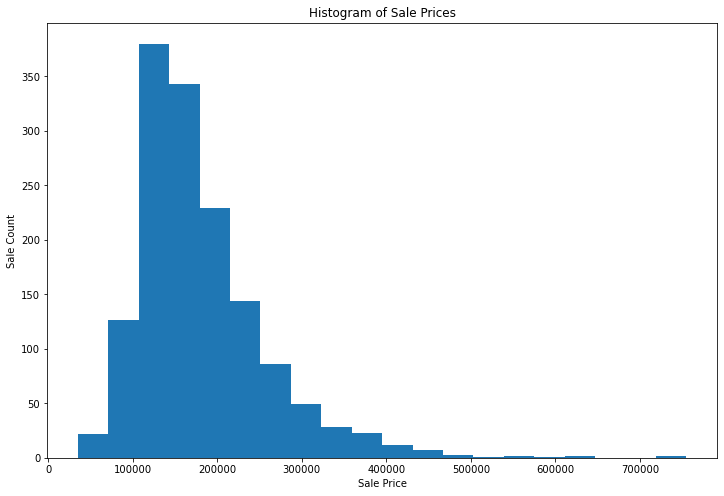

In [20]:
# Your code here
#produce a histogram for SalePrice

fig, ax = plt.subplots(figsize = (12, 8))
ax.hist(ames_housing_df['SalePrice'], bins=20)

# Customize the plot
ax.set_title('Histogram of Sale Prices')
ax.set_xlabel('Sale Price');
ax.set_ylabel('Sale Count');

Now, print out the mean, median, and standard deviation:

In [26]:
# Your code here
print('Mean sale price: $' + str(ames_housing_df['SalePrice'].mean()))
print('Median sale price: $' + str(ames_housing_df['SalePrice'].median()))
print('Standard deviation sale price: $' + str(ames_housing_df['SalePrice'].std()))




Mean sale price: $180921.19589041095
Median sale price: $163000.0
Standard deviation sale price: $79442.50288288662


In the cell below, interpret the above information.

In [53]:
# Replace None with appropriate text
"""
The mean sale price is higher than the median, indicating a potential right-skewed distribution influenced by higher-priced properties.
The standard deviation is relatively large, indicating a significant spread or variability in sale prices. This could be due to a wide range of property values in the dataset.
For this dataset, median can be a good value of central tendency.
"""

'\nThe mean sale price is higher than the median, indicating a potential right-skewed distribution influenced by higher-priced properties.\nThe standard deviation is relatively large, indicating a significant spread or variability in sale prices. This could be due to a wide range of property values in the dataset.\nFor this dataset, median can be a good value of central tendency.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

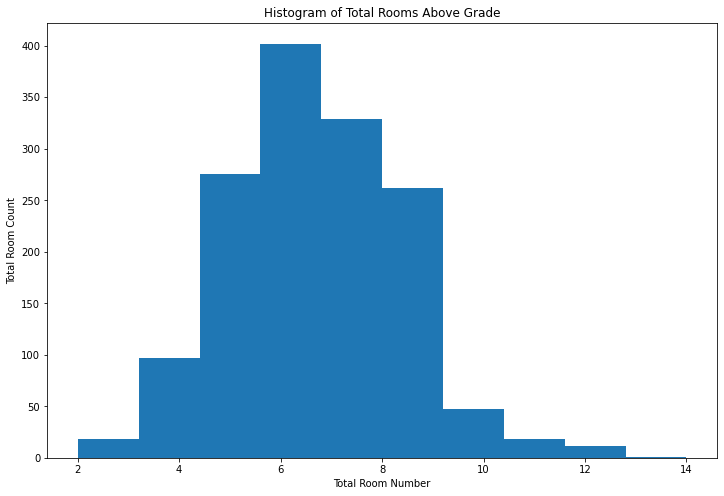

In [30]:
# Your code here
#produce a histogram for TotRmsAbvGrd

fig, ax = plt.subplots(figsize = (12, 8))
ax.hist(ames_housing_df['TotRmsAbvGrd'], bins=10)

# Customize the plot
ax.set_title('Histogram of Total Rooms Above Grade')
ax.set_xlabel('Total Room Number');
ax.set_ylabel('Total Room Count');

Now, print out the mean, median, and standard deviation:

In [31]:
# Your code here
print('Mean Total Rooms Above Grade: $' + str(ames_housing_df['TotRmsAbvGrd'].mean()))
print('Median Total Rooms Above Grade: $' + str(ames_housing_df['TotRmsAbvGrd'].median()))
print('Standard deviation Total Rooms Above Grade: $' + str(ames_housing_df['TotRmsAbvGrd'].std()))


Mean Total Rooms Above Grade: $6.517808219178082
Median Total Rooms Above Grade: $6.0
Standard deviation Total Rooms Above Grade: $1.6253932905840505


In the cell below, interpret the above information.

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

<ipython-input-115-1c253d5933f8>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(reversed(overall_dict.values()), rotation=45);


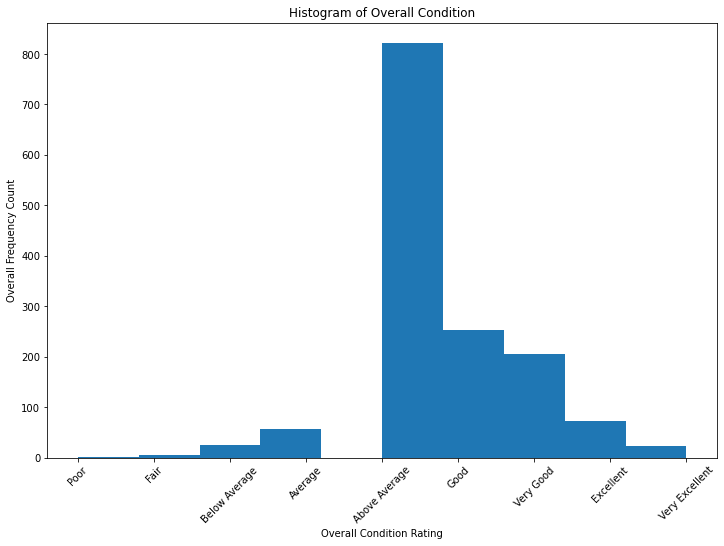

In [115]:
# Your code here
#produce a histogram for OverallCond

fig, ax = plt.subplots(figsize = (12, 8))
ax.hist(ames_housing_df['OverallCond'], bins=10)

# Customize the plot
ax.set_title('Histogram of Overall Condition')
ax.set_xlabel('Overall Condition Rating');
ax.set_ylabel('Overall Frequency Count');
overall_dict = {10:'Very Excellent', 9:'Excellent', \
                8:'Very Good', 7:'Good', \
                6:'Above Average', 5:'Average', \
                4:'Below Average', 3:'Fair', \
                2:'Poor', 1:'Very Poor'}

relabeled_oa_cnd = ames_housing_df['OverallCond'].map(overall_dict)
relabeled_oa_cnd.value_counts();
ax.set_xticklabels(reversed(overall_dict.values()), rotation=45);


Now, print out the mean, median, and standard deviation:

In [46]:
# Your code here
# Your code here
print('Mean Overall Condition: $' + str(ames_housing_df['OverallCond'].mean()))
print('Median Overall Condition: $' + str(ames_housing_df['OverallCond'].median()))
print('Standard Deviation Overall Condition: $' + str(ames_housing_df['OverallCond'].std()))


Mean Overall Condition: $5.575342465753424
Median Overall Condition: $5.0
Standard Deviation Overall Condition: $1.1127993367127316


In the cell below, interpret the above information.

In [54]:
# Replace None with appropriate text
"""
The mean Overall Condition is quite close to the median, indicating a symmetric distribution.\n 
The standard deviation is relatively small, indicating a low variability (number of outliers).
For this dataset, mean can be a good value of central tendency.
"""

'\nThe mean Overall Condition is quite close to the median, indicating a symmetric distribution.\n \nThe standard deviation is relatively small, indicating a low variability (number of outliers).\nFor this dataset, mean can be a good value of central tendency.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [59]:
# Replace None with appropriate code
below_average_condition = ames_housing_df[ames_housing_df['OverallCond']<5]
average_condition = ames_housing_df[(ames_housing_df['OverallCond'] == 5)]
above_average_condition = ames_housing_df[ames_housing_df['OverallCond']>5]

The following code checks that you created the subsets correctly:

In [60]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

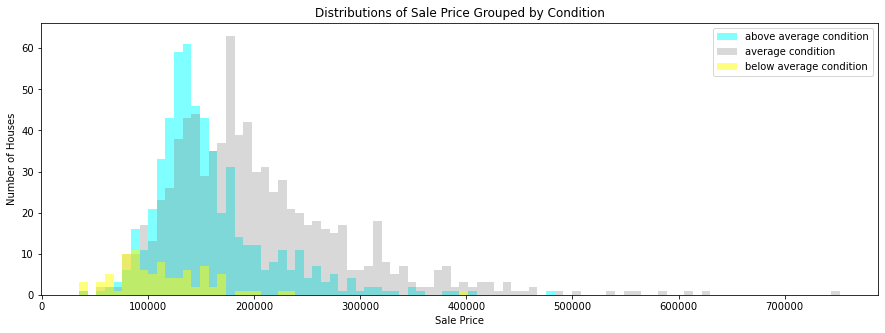

In [62]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(ames_housing_df["SalePrice"].min(), ames_housing_df["SalePrice"].max(), int(ames_housing_df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [63]:
# Replace None with appropriate text
"""
1. Houses with overall contidion below average have significantly lower mean selling price.
2. The number of houses sold in below average condition is significantly lower than the other two cathegories.
That tells us that either the supply or the demand is low (likely both).
3. Trends in the distribution for the sale price for below avg condition: there's a visible preference for mid to high-range houses (likely larger house or larger land parcel, or good location, there's a potential for flipping).
4. Avg and Above avg sales have a vell-defined mean value that is the same for both datasets.
5. Avg sales tend to have more symmetric narrow distribution. The majority of the sales happens around the same number.
6. Avove avg is skewed (mean << median) because of the variability ($$$$ outliers).
"""

"\n1. Houses with overall contidion below average have significantly lower mean selling price.\n2. The number of houses sold in below average condition is significantly lower than the other two cathegories.\nThat tells us that either the supply or the demand is low (likely both).\n3. Trends in the distribution for the sale price for below avg condition: there's a visible preference for mid to high-range houses (likely larger house or larger land parcel, or good location, there's a potential for flipping).\n4. Avg and Above avg sales have a vell-defined mean value that is the same for both datasets.\n5. Avg sales tend to have more symmetric narrow distribution. The majority of the sales happens around the same number.\n6. Avove avg is skewed (mean << median) because of the variability ($$$$ outliers).\n"

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [108]:
# Your code here
# Calculate Pearson correlation coefficient using Pandas
selected_column = 'SalePrice'

# Calculate correlation with all other columns
correlations_with_self = ames_housing_df.corrwith(ames_housing_df[selected_column])
correlations = correlations_with_self.drop(selected_column)
# Display the correlation results
print(f"Correlation with '{selected_column}':")
print(correlations)


Correlation with 'SalePrice':
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
dtype: float64


Now, find the ***most negatively correlated*** column:

In [109]:
# Your code here
print(f"Most Negative Correlation with '{selected_column}':")
print(f"Column: {correlations.idxmin()}, Corr Value: {correlations.min()}")

#print(ames_housing_df[correlations.idxmin()])


Most Negative Correlation with 'SalePrice':
Column: KitchenAbvGr, Corr Value: -0.13590737084214122


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

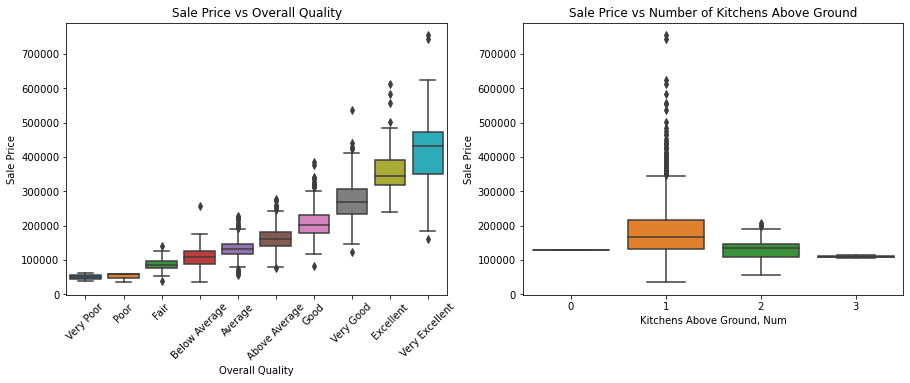

In [114]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation

sns.boxplot(
    x=ames_housing_df[correlations.idxmax()],
    y=ames_housing_df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=ames_housing_df[correlations.idxmin()],
    y=ames_housing_df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title('Sale Price vs Overall Quality')
ax1.set_xlabel('Overall Quality')
ax1.set_xticklabels(reversed(overall_dict.values()), rotation=45);

ax1.set_ylabel("Sale Price")
ax2.set_title('Sale Price vs Number of Kitchens Above Ground')
ax2.set_xlabel('Kitchens Above Ground, Num')
ax2.set_ylabel("Sale Price");


Interpret the results below. Consult `data/data_description.txt` as needed.

In [117]:
# Replace None with appropriate text
"""
1. The better the O/A quality of the house, the highter is the avg sale price.
2. The better the O/A quality of the house, the greater is the variabily of the sale price.
3. The majority of the houses sold have 1 kitchen above the ground.
4. The number of sales of houses with more than a single kitchen above ground goes down as well as the avg sale price.
"""

'\n1. The better the O/A quality of the house, the highter is the avg sale price.\n2. The better the O/A quality of the house, the greater is the variabily of the sale price.\n3. The majority of the houses sold have 1 kitchen above the ground.\n4. The number of sales of houses with more than a single kitchen above ground goes down as well as the avg sale price.\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [116]:
# Run this cell without changes
ames_housing_df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

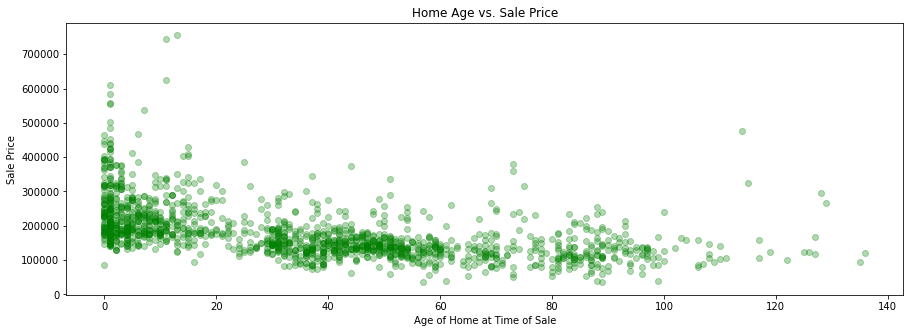

In [118]:
# Run this cell without changes

# Make a new column, Age
ames_housing_df["Age"] = ames_housing_df["YrSold"] - ames_housing_df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(ames_housing_df["Age"], ames_housing_df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [120]:
# Replace None with appropriate text
"""
1. There are two visible data clusters: one in 0-10 years range, another in 30-60 yrs range and there's a void around 20 years. 
    Tells us that there's alot of new houses are being built and bought (area is rapidly developing), currently there is a an economic boom.
    People that bought their houses 20 years ago are still living in them and don't sell them.
    Or, another interpretation, is that there was an economic downtime in the area and not much new houses were built 20 years ago. 
    People that bought their houses 30-60 years ago are selling. 
2. The newer the house, the highter the price!
3. The older the house, the lower the sale price is. 

"""

"\n1. There are two visible data clusters: one in 0-10 years range, another in 30-60 yrs range and there's a void around 20 years. \n    Tells us that there's alot of new houses are being built and bought (area is rapidly developing), currently there is a an economic boom.\n    People that bought their houses 20 years ago are still living in them and don't sell them.\n    Or, another interpretation, is that there was an economic downtime in the area and not much new houses were built 20 years ago. \n    People that bought their houses 30-60 years ago are selling. \n2. The newer the house, the highter the price!\n3. The older the house, the lower the sale price is. \n\n"

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.